In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random 

In [37]:
hostnames= []
dataset=[]
df= None


In [38]:
def set_hostnames(number_of_hosts: int):
    global hostnames
    hostnames = []
    #SO
    os_choose=['L','S','A','H']
    os_percentage=[0.4, 0.3, 0.2, 0.1]

    #Enviorement
    env_choose=['D','I','T','S','P']
    env_percentage= [0.1,0.1,0.25,0.25,0.30]

    #country
    country_choose=['NOR','FRA','ITA','ESP','DEU','IRL']
    country_percentage=[0.06,0.09,0.16,0.16,0.23,0.30]

    node_count = {}

    for i in range(number_of_hosts):
        os = random.choices(os_choose, weights=os_percentage, k=1)[0]
        env = random.choices(env_choose, weights=env_percentage, k=1)[0]
        country = random.choices(country_choose, weights=country_percentage, k=1)[0]
        key = f"{os}-{env}-{country}"
        node = node_count.get(key, 0)+1
        node_count[key] = node
        node_str = f"{node:03}"
        hostname = f"{os}{env}{country}{node_str}"
        hostnames.append(hostname)
    return hostnames

In [39]:
def get_os(hostnames: str) -> str:
    hostnames_os = {
        'L': 'Linux',
        'S': 'Solaris',
        'A': 'AIX',
        'H': 'HP-UX'
    }
    return hostnames_os.get(hostnames[0], 'Unknown')

In [40]:
def get_enviroment(hostnames: str) -> str:
    hostnames_env = {
        'D': 'Development',
        'I': 'Integration',
        'T': 'Testing',
        'S': 'Staging',
        'P': 'Production'
    }
    if len(hostnames) > 1:
        env_code = hostnames[1]
        return hostnames_env.get(env_code, 'Unknown')
    else:
        return 'Unknown'

In [41]:
def get_country(hostnames: str) -> str:
    hostnames_country = {
        'NOR': 'Norway',
        'FRA': 'France',
        'ITA': 'Italy',
        'ESP': 'Spain',
        'DEU': 'Germany',
        'IRL': 'Ireland'
    }
    return hostnames_country.get(hostnames[2:5], 'Unknown')

In [42]:
def set_dataframe(count: int) -> None:
    global df
    global dataset
    
    set_hostnames(count)
    dataset = [
        {
          "hostname": hostname,
            "os": get_os(hostname),
            "enviroment": get_enviroment(hostname),
            "country": get_country(hostname),
            "node": int(hostname[-2:])
        }
        for hostname in hostnames
    ]
   
    df = pd.DataFrame(dataset)

In [43]:
set_dataframe(1500)
df

,hostname,os,enviroment,country,node
0,LTFRA001,Linux,Testing,France,1
1,LPDEU001,Linux,Production,Germany,1
2,HDESP001,HP-UX,Development,Spain,1
3,HDESP002,HP-UX,Development,Spain,2
4,LIDEU001,Linux,Integration,Germany,1
...,...,...,...,...,...
1495,LTITA023,Linux,Testing,Italy,23
1496,ATESP009,AIX,Testing,Spain,9
1497,ATITA013,AIX,Testing,Italy,13
1498,SPFRA010,Solaris,Production,France,10


In [44]:
df.to_csv('hosts.csv', header=True, index=False)
hosts_df= pd.read_csv('hosts.csv')
hosts_df

,hostname,os,enviroment,country,node
0,LTFRA001,Linux,Testing,France,1
1,LPDEU001,Linux,Production,Germany,1
2,HDESP001,HP-UX,Development,Spain,1
3,HDESP002,HP-UX,Development,Spain,2
4,LIDEU001,Linux,Integration,Germany,1
...,...,...,...,...,...
1495,LTITA023,Linux,Testing,Italy,23
1496,ATESP009,AIX,Testing,Spain,9
1497,ATITA013,AIX,Testing,Italy,13
1498,SPFRA010,Solaris,Production,France,10


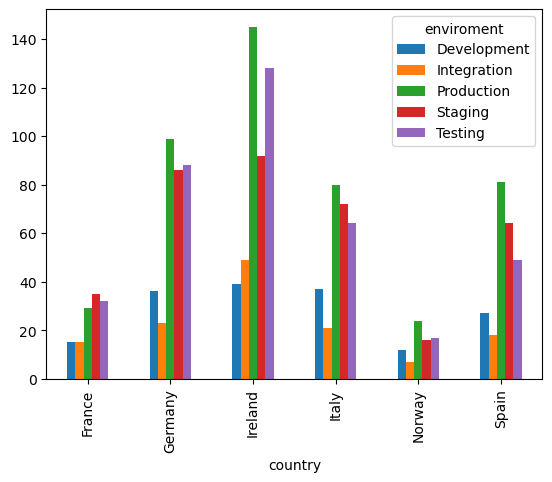

In [45]:
grouped = hosts_df.groupby(['country', 'enviroment']).size().unstack()
grouped.plot(kind='bar');

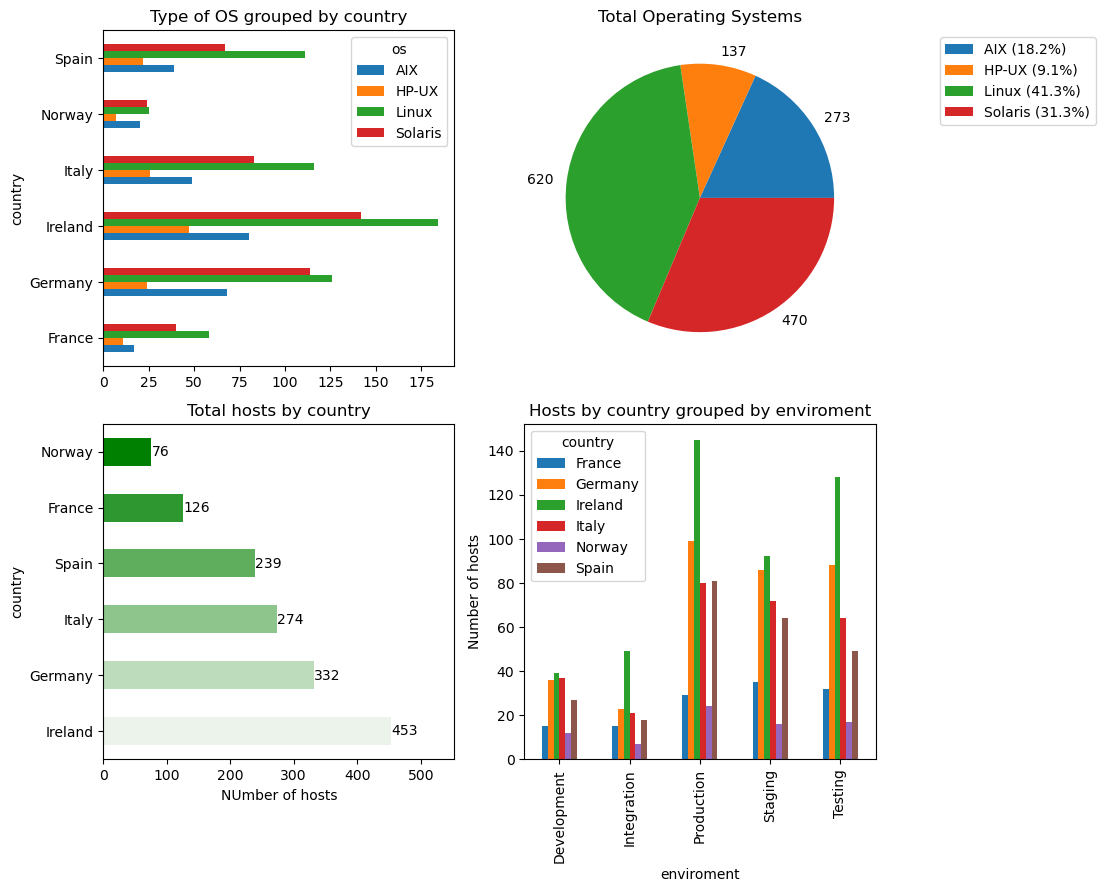

In [46]:
#Malla
figure, axes = plt.subplots(2,2, figsize=(11, 9))

#Figura 1
country_os = hosts_df.groupby(['country','os']).size().unstack()
country_os.plot(kind='barh', ax=axes[0,0])
axes[0,0].set_title('Type of OS grouped by country')

#Figura 2
total_os= df.groupby(['os']).size()
total_os.plot(kind='pie', ax= axes[0,1], legend=True, labels=total_os)
axes[0,1].set_title('Total Operating Systems')
legend_labels = total_os.index.to_series().apply(
    lambda os_type: f"{os_type} ({(total_os[os_type] / total_os.sum() * 100):.1f}%)"
)
axes[0,1].legend(legend_labels, loc='upper right', bbox_to_anchor=(1.7,1))

#Figura 3
total_country= df['country'].value_counts()
total_len = len(total_country)
palette = sns.light_palette("green", n_colors=total_len)
colors = [palette[i] for i in range(total_len)]
total_country.plot(kind='barh', ax=axes[1,0],  color=colors)
axes[1,0].set_xlabel('NUmber of hosts')
axes[1,0].set_ylabel('country')
axes[1,0].set_title('Total hosts by country')
max_value = total_country.max()
for y, x in enumerate(total_country):
    axes[1,0].annotate(
        str(x), 
        xy=(x, y), 
        va='center'
    )
axes[1,0].set_xlim(0, max_value+100)

#figura 4
country_env= df.groupby(['country', 'enviroment']).size().unstack(0)
country_env.plot(kind='bar',ax=axes[1,1])
figure.tight_layout()
axes[1,1].set_ylabel('Number of hosts')
axes[1,1].set_title('Hosts by country grouped by enviroment');
figure.tight_layout(pad=1)